# ЛР1 ИУ5-62Б Ковалев Сергей

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [2]:
data = pd.read_csv('/Users/set27/Downloads/norway_new_car_sales_by_make.txt', sep=",")

# Основные характеристики

In [3]:
data.head()

,Year,Month,Make,Quantity,Pct
0,2007,1,Toyota,2884,22.7
1,2007,1,Volkswagen,2521,19.9
2,2007,1,Peugeot,1029,8.1
3,2007,1,Ford,870,6.9
4,2007,1,Volvo,693,5.5


In [4]:
data.shape

(4377, 5)

In [5]:
data.columns

Index(['Year', 'Month', 'Make', 'Quantity', 'Pct'], dtype='object')

In [6]:
data.dtypes

Year          int64
Month         int64
Make         object
Quantity      int64
Pct         float64
dtype: object

In [7]:
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

Year - 0
Month - 0
Make - 10
Quantity - 0
Pct - 0


In [8]:
data.describe()

,Year,Month,Quantity,Pct
count,4377.000000,4377.000000,4377.000000,4377.000000
mean,2011.421065,6.459904,307.802148,2.762257
std,2.906408,3.446815,411.315021,3.635185
min,2007.000000,1.000000,1.000000,0.000000
25%,2009.000000,3.000000,14.000000,0.100000
50%,2011.000000,6.000000,153.000000,1.400000
75%,2014.000000,9.000000,461.000000,4.200000
max,2017.000000,12.000000,3017.000000,22.700000


<AxesSubplot:xlabel='Quantity', ylabel='Pct'>

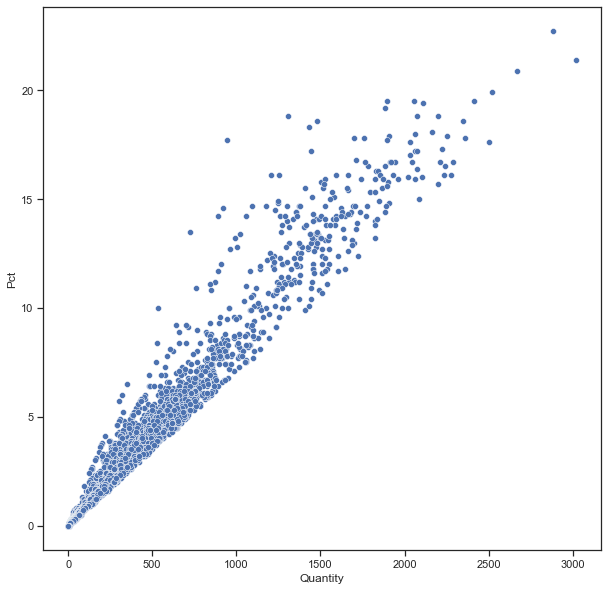

In [10]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='Quantity', y='Pct', data=data)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Quantity', ylabel='Density'>

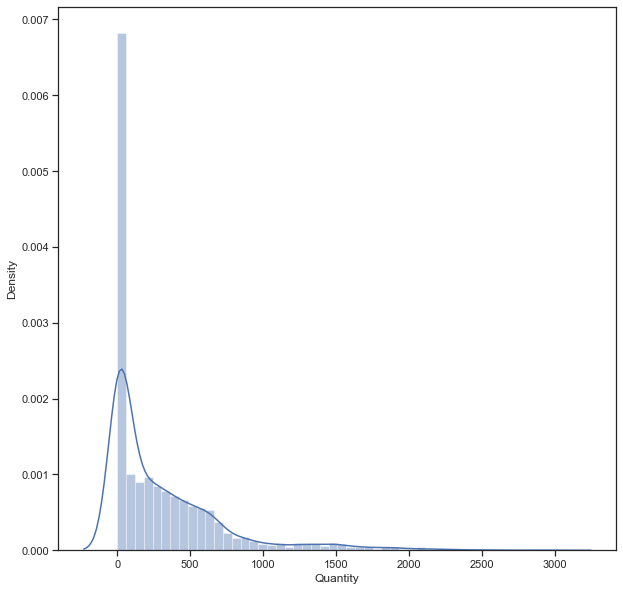

In [11]:
#Гистограмма
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['Quantity'])

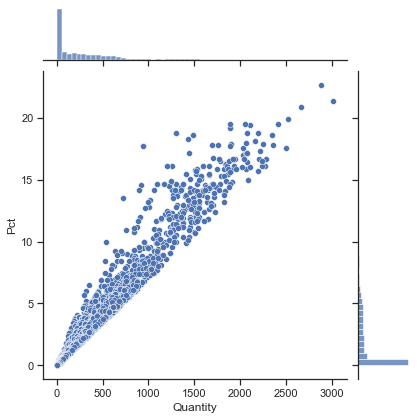

In [12]:
#Jointplot
sns.jointplot(x='Quantity', y='Pct', data=data)

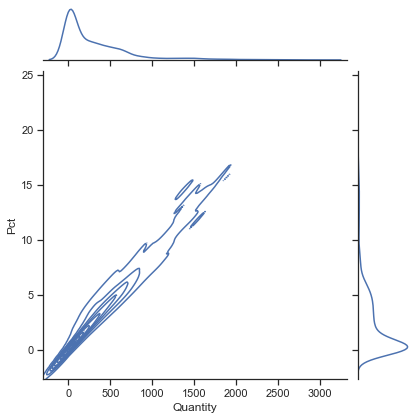

In [13]:
sns.jointplot(x='Quantity', y='Pct', data=data, kind="kde")

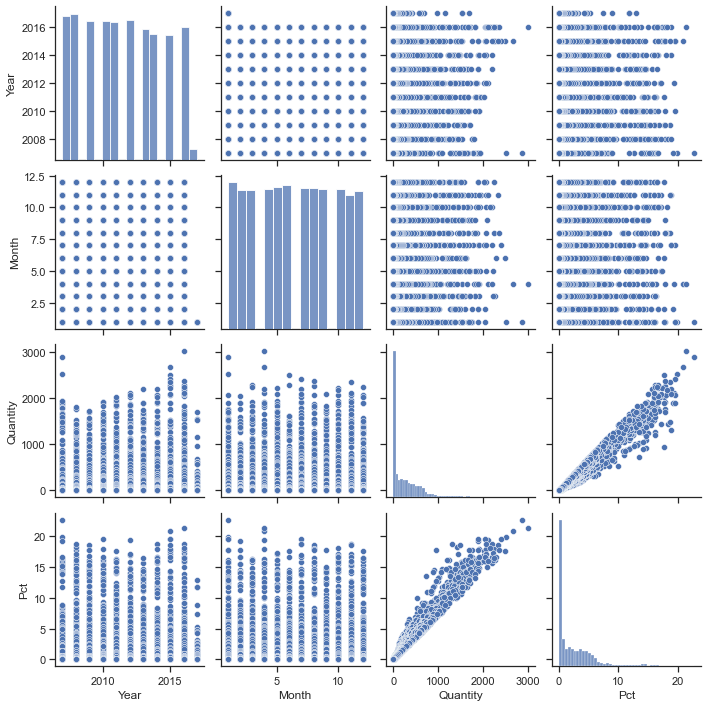

In [14]:
sns.pairplot(data)

<AxesSubplot:xlabel='Quantity'>

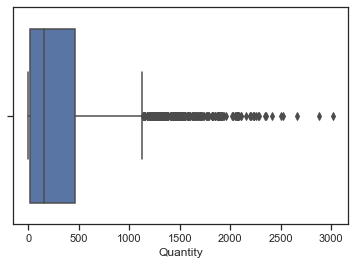

In [15]:
sns.boxplot(x=data['Quantity'])

<AxesSubplot:xlabel='Quantity'>

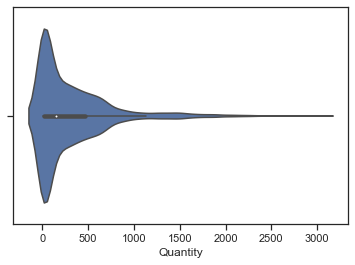

In [16]:
sns.violinplot(x=data['Quantity'])

# Информация о корреляциипризнаков

In [17]:
data.corr()

,Year,Month,Quantity,Pct
Year,1.000000,-0.022734,0.108568,0.032452
Month,-0.022734,1.000000,0.005691,-0.001356
Quantity,0.108568,0.005691,1.000000,0.980896
Pct,0.032452,-0.001356,0.980896,1.000000


In [18]:
data.corr(method='pearson')

,Year,Month,Quantity,Pct
Year,1.000000,-0.022734,0.108568,0.032452
Month,-0.022734,1.000000,0.005691,-0.001356
Quantity,0.108568,0.005691,1.000000,0.980896
Pct,0.032452,-0.001356,0.980896,1.000000


In [19]:
data.corr(method='kendall')

,Year,Month,Quantity,Pct
Year,1.000000,-0.014824,0.080959,0.041239
Month,-0.014824,1.000000,0.002298,-0.003369
Quantity,0.080959,0.002298,1.000000,0.935058
Pct,0.041239,-0.003369,0.935058,1.000000


In [20]:
data.corr(method='spearman')

,Year,Month,Quantity,Pct
Year,1.000000,-0.020393,0.116745,0.058982
Month,-0.020393,1.000000,0.003307,-0.004739
Quantity,0.116745,0.003307,1.000000,0.991342
Pct,0.058982,-0.004739,0.991342,1.000000


<AxesSubplot:>

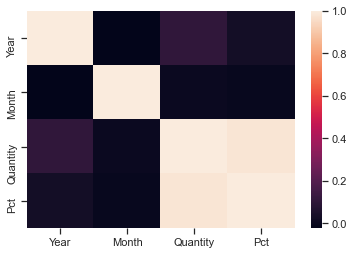

In [21]:
sns.heatmap(data.corr())

<AxesSubplot:>

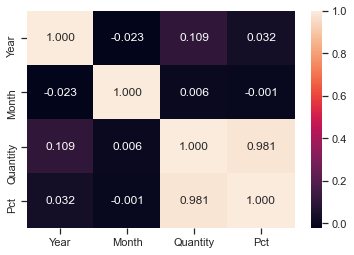

In [22]:
# Вывод значений в ячейках
sns.heatmap(data.corr(), annot=True, fmt='.3f')

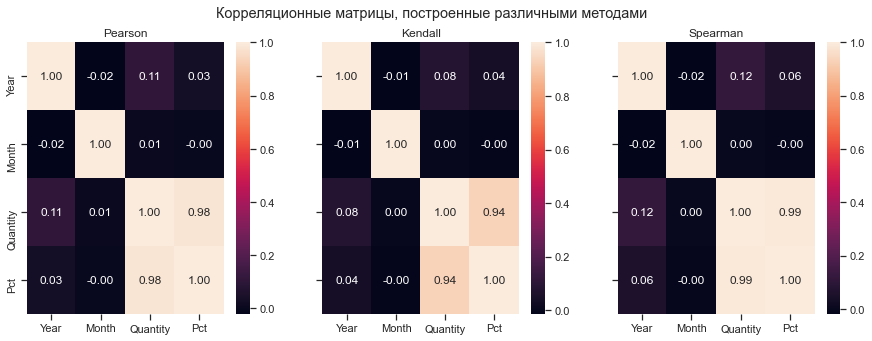

In [23]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(data.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')